In [1]:
import tensorflow as tf
from tf_crnn.loader import PredictionModel
from imageio import imread
import os

import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [3]:
model_dir = './output_hangul_eren_750_v1/export/1552705958/'

/home/eren/tmp/tf-crnn/data/images/test_hangul/training_1555_두_6.jpg


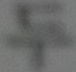

In [4]:
# Test Script 

IMAGE_PATH = '/home/eren/tmp/tf-crnn/data/images/test_hangul/'
image_name = random.choice(os.listdir(IMAGE_PATH))
img = os.path.join(IMAGE_PATH, image_name)
print(img)
Image.open(img)

In [5]:
image = imread(img ,as_gray=True, pilmode='RGB')[: ,:, None]

In [6]:
with tf.Session() as sess:
    model = PredictionModel(model_dir)
    predictions = model.predict(image)
    transcription = predictions['words']
    score = predictions['score'] # Around 10.0 -> seems pretty sure, less than 5.0 bit unsure, some errors/challenging images

INFO:tensorflow:Restoring parameters from ./output_hangul_eren_750_v1/export/1552705958/variables/variables


In [7]:
transcription[0].decode('utf-8')

'두'

# Accuracy measure

In [8]:
# Print Accuracy for test dataset + error list zip..

import csv

from tqdm import tqdm

real_label_list = []
no_error_label_list = []
error_label_list = []
error_label_index = []
filename_list = []
error_file_list = []
with open('/home/eren/tmp/tf-crnn/data/csv/test.csv') as f:
    data = f.read().strip().split('\n')
    for text in [dat.split('_')[3] for dat in data]:
        real_label_list.append(text)
    for file in [dat.split('/')[-1] for dat in data]:
        filename_list.append(file)
    
accuracy = 0

with tf.Session() as sess:
        model = PredictionModel(model_dir)
        for i in tqdm(range(500), desc='Test'):
            filename = random.choice(data)
            file_index = data.index(filename)
            image = imread(filename, as_gray=True, pilmode='RGB')[: ,:, None]
            predictions = model.predict(image)
            transcription = predictions['words']
            if transcription[0].decode('utf-8') == real_label_list[file_index]:
                accuracy = accuracy + 1/500
                no_error_label_list.append(transcription[0].decode('utf-8'))
            else:
                error_label_list.append(transcription[0].decode('utf-8'))
                error_label_index.append(file_index)
                error_file_list.append(filename_list[file_index])
                
                
accuracy = accuracy * 100


INFO:tensorflow:Restoring parameters from ./output_hangul_eren_750_v1/export/1552705958/variables/variables


Test:   8%|▊         | 40/500 [00:18<03:16,  2.35it/s]

ValueError: Could not find a format to read the specified file in mode 'i'

In [ ]:
accuracy

# Error GT text 수정

In [10]:
len(error_label_index)

37

In [11]:
error_file_list

['training_1329_종_60.jpg',
 'training_1329_편에_40.jpg',
 'training_1440_참_25.jpg',
 'training_1602_알_28.jpg',
 'training_1484_잴 수_1.jpg',
 'training_1653_세_16.jpg',
 'training_1440_진_32.jpg',
 'training_1122_못하는_22.jpg',
 'training_1641_원리 이용_12.jpg',
 'training_1329_람_64.jpg',
 'training_1676_클_63.jpg',
 'training_1255_같이 계단_30.jpg',
 'training_1622_세_3.jpg',
 'training_1298_게_25.jpg',
 'training_1324_수사_13.jpg',
 'training_1423_검_25.jpg',
 'training_1264_세제곱근_2.jpg',
 'training_1434_회_16.jpg',
 'training_1416_차_22.jpg',
 'training_1314_지구_17.jpg',
 'training_1268_남학생_56.jpg',
 'training_1222_도전 심화_0.jpg',
 'training_1622_차례로_14.jpg',
 'training_1225_올_0.jpg',
 'training_1585_중요해요_3.jpg',
 'training_1181_을_36.jpg',
 'training_1298_의견이 대_36.jpg',
 'training_1580_하여_7.jpg',
 'training_1181_그려_39.jpg',
 'training_1297_반_17.jpg',
 'training_1622_차례로_14.jpg',
 'training_1676_성취_2.jpg',
 'training_1622_차례로_14.jpg',
 'training_1122_칠_21.jpg',
 'training_1434_회_16.jpg',
 'training_1515_백의_16.j

In [12]:
no_error_label_list

['건축',
 '평면으로',
 '번째',
 '물질',
 '배가',
 '는',
 '이는',
 '국가',
 '평행',
 '구',
 '방향으로',
 '사람의',
 '접',
 '좌표평면',
 '되도록',
 '차를',
 '수를',
 '오',
 '철근',
 '서로',
 '홍보',
 '홍보',
 '만족시키도록',
 '선분',
 '빨리',
 '지면',
 '체는',
 '자주',
 '값을',
 '삼각형',
 '그래프가',
 '알',
 '최대가',
 '일',
 '가지',
 '과목만',
 '몇',
 '부분의',
 '각',
 '두',
 '의',
 '서',
 '돌아온',
 '오른쪽',
 '값을',
 '넓이의',
 '문제',
 '다른',
 '부피가',
 '특성이',
 '의',
 '것을',
 '집합',
 '변곡점의',
 '합하여',
 '조가',
 '구하여라',
 '한',
 '의',
 '를',
 '포집',
 '각각',
 '하나씩',
 '가거도',
 '색으로',
 '대로',
 '대한',
 '그림과',
 '만족하는',
 '대출받으면서',
 '해를',
 '주머',
 '실으려면',
 '미분계수를',
 '꼭짓점',
 '같을 때',
 '의',
 '한',
 '최대',
 '숫자',
 '대로',
 '대각선이',
 '어른',
 '퍼',
 '구하였더니',
 '최솟값',
 '고구',
 '돌아온',
 '각형',
 '동호회에서',
 '나눈',
 '대하여',
 '철근',
 '두',
 '이때',
 '오른쪽',
 '지난달',
 '차례로',
 '않은',
 '영역으로',
 '중점을',
 '가득',
 '교점을',
 '주차선의',
 '만족시키는',
 '값을',
 '오른쪽',
 '자연수',
 '진자를',
 '다음',
 '것이다',
 '무게는',
 '접하도록',
 '이용하여',
 '다섯',
 '고구',
 '면인',
 '둘러싸인',
 '은',
 '때',
 '때',
 '이',
 '중복하여',
 '횟수',
 '둘러싸인',
 '규',
 '를',
 '일',
 '때',
 '인접한',
 '정수',
 '온도를',
 '발을',
 '새로운',
 '

In [13]:
error_label_list

['걸',
 '편어',
 '찰',
 '일',
 '짧수',
 '서',
 '전',
 '못한는',
 '원리이를',
 '림',
 '를',
 '같아계단',
 '서',
 '거',
 '수시',
 '리',
 '세제곱로',
 '호',
 '처',
 '체구',
 '남학',
 '도전 성의',
 '차세로',
 '돌',
 '중요해도',
 '될',
 '의견이 다',
 '하어',
 '그런',
 '빈',
 '차세로',
 '성류',
 '차세로',
 '철',
 '호',
 '택의',
 '처']

In [14]:
IMAGE_PATH = '/home/eren/tmp/tf-crnn/data/images/test_hangul/'

for i in range(37):
    result = set(error_label_list[i])
    print(result, error_label_index[i])
    image_name = error_file_list[i]
    img = os.path.join(IMAGE_PATH, image_name)
    print(img)

{'걸'} 1340
/home/eren/tmp/tf-crnn/data/images/test_hangul/training_1329_종_60.jpg
{'편', '어'} 62
/home/eren/tmp/tf-crnn/data/images/test_hangul/training_1329_편에_40.jpg
{'찰'} 4868
/home/eren/tmp/tf-crnn/data/images/test_hangul/training_1440_참_25.jpg
{'일'} 7489
/home/eren/tmp/tf-crnn/data/images/test_hangul/training_1602_알_28.jpg
{'수', '짧'} 1842
/home/eren/tmp/tf-crnn/data/images/test_hangul/training_1484_잴 수_1.jpg
{'서'} 3858
/home/eren/tmp/tf-crnn/data/images/test_hangul/training_1653_세_16.jpg
{'전'} 510
/home/eren/tmp/tf-crnn/data/images/test_hangul/training_1440_진_32.jpg
{'는', '한', '못'} 5276
/home/eren/tmp/tf-crnn/data/images/test_hangul/training_1122_못하는_22.jpg
{'리', '원', '를', '이'} 3029
/home/eren/tmp/tf-crnn/data/images/test_hangul/training_1641_원리 이용_12.jpg
{'림'} 2956
/home/eren/tmp/tf-crnn/data/images/test_hangul/training_1329_람_64.jpg
{'를'} 7725
/home/eren/tmp/tf-crnn/data/images/test_hangul/training_1676_클_63.jpg
{'아', '계', '같', '단'} 726
/home/eren/tmp/tf-crnn/data/images/test_hang

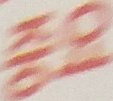

In [14]:
Image.open('/home/eren/tmp/tf-crnn/data/images/test_hangul/training_1494_중요_0.jpg')

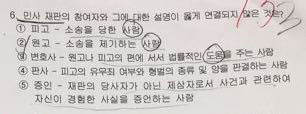

In [13]:
Image.open('/mnt/nas_rnd/jessie/data/layout/images/training_1329.jpg')

# NEW CHANGED TEST CSV

In [14]:
IMAGE_PATH = '/home/eren/tmp/tf-crnn/data/images/test_hangul/'

image_name = os.listdir(IMAGE_PATH)
new_file_list = []
for file in image_name:
    img = os.path.join(IMAGE_PATH, file)
    new_file_list.append(img)

with open('/home/eren/tmp/tf-crnn/data/csv/test.csv', 'w') as f:
    for img in new_file_list:
        f.write(img)
        f.write('\n')

In [15]:
len(image_name)

8272